<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/HA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.3 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF =  
       1
----------------
20 s^2 + 4 s + 2

Open loop TF =  
      0.05
-----------------
s^2 + 0.2 s + 0.1

wn =  0.31622776601683794
zeta =  0.31622776601683794
Tp =  10.471975511965978
%OS =  35.0
Ts =  40.0
closed loop TF =  
       0.05
------------------
s^2 + 0.2 s + 0.15

Poles =  [-0.1+0.37416574j -0.1-0.37416574j]
Zeros =  []
kp =  0.5
ess =  0.6666666666666666


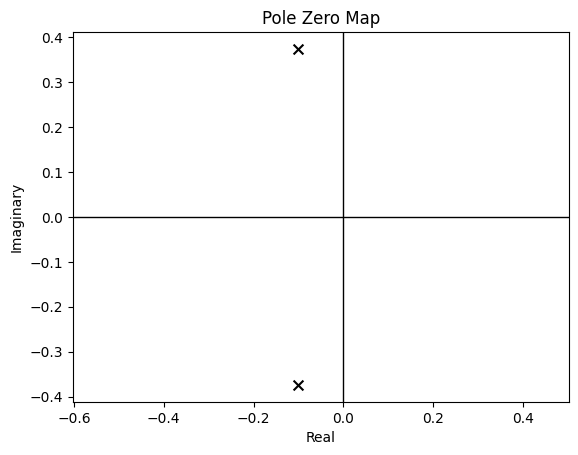

In [5]:
# Define your transfer function:
m = 20
D = 4
K = 2
#G(s) = 1 / (ms^2+Ds+K)
num = [1]
den = [m, D, K]
G = tf(num,den)
print ("Open loop TF = ", G)

num = [1/m]
den = [m/m, D/m, K/m]
G = tf(num,den)
print ("Open loop TF = ", G)

wn = np.sqrt(K/m)
zeta = (D/m)/(2*wn)
Tp = np.pi/(wn*np.sqrt(1-zeta**2))
OS = np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))*100
Ts = 4/(zeta*wn)

print("wn = ", wn)
print("zeta = ", zeta)      # 0 < zeta < 1 (underdamped system)
print("Tp = ", Tp)
print("%OS = ", np.round(OS))
print("Ts = ", Ts)


CL = feedback(G, 1)

print("closed loop TF = ", CL)

(p,z) = pzmap(CL)
print("Poles = ",p)
print("Zeros = ",z)

kp = G.dcgain()
print("kp = ", kp)
print("ess = ", 1/(1+kp))

Text(0, 0.5, 'volt')

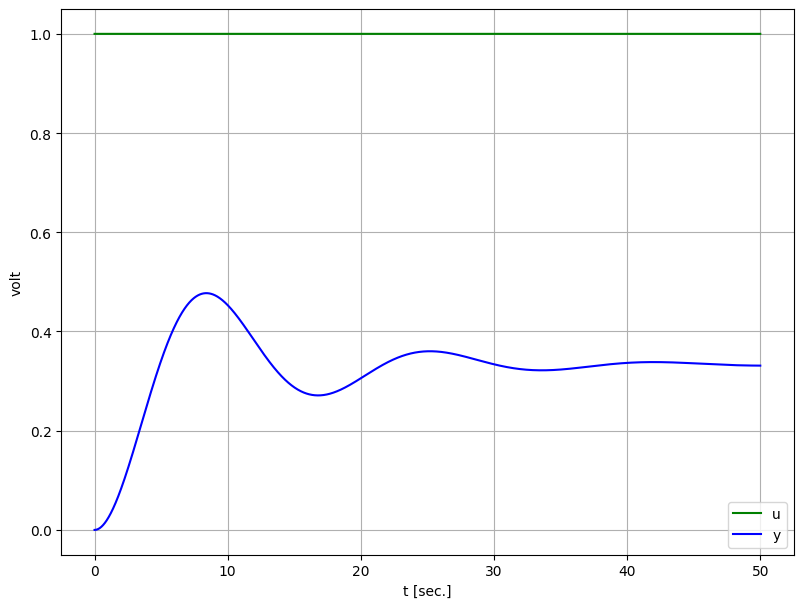

In [29]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 50
dt = 0.01
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(CL, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")

Text(0, 0.5, 'volt')

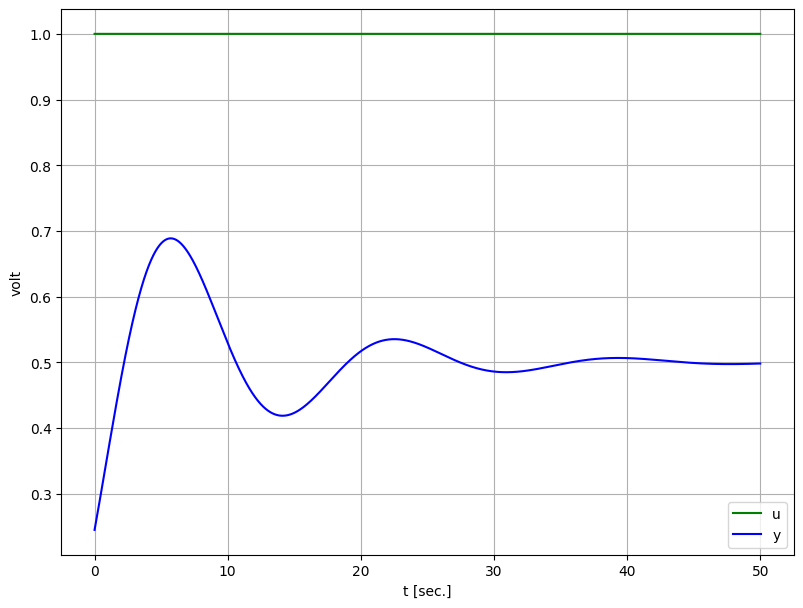

In [28]:
# simulate the response of y(t)
y = 0.5+2*0.173*np.exp(-0.1*t)*np.cos(0.374*t-14.967)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")

State Space Representation:
A matrix: 
 [[-0.2  -0.15]
 [ 1.    0.  ]]
B matrix: 
 [[1.]
 [0.]]
C matrix: 
 [[0.   0.05]]
D matrix: 
 [[0.]]


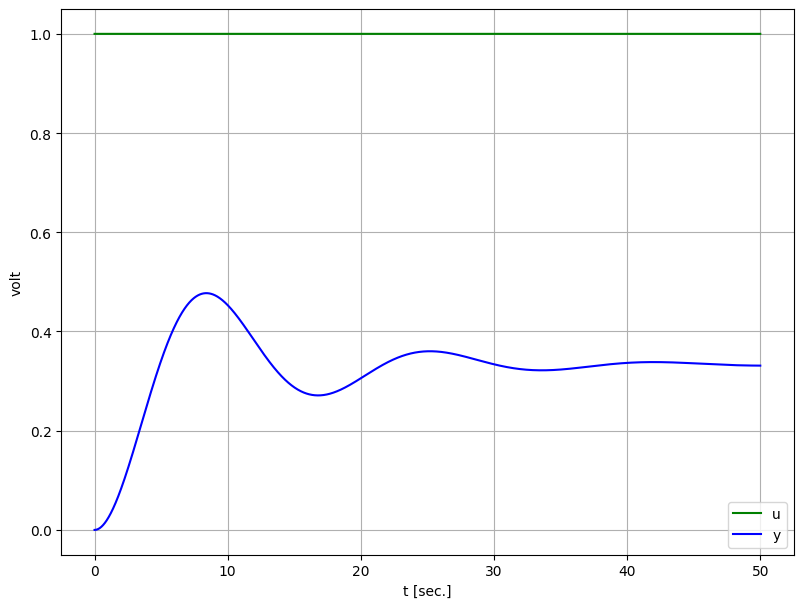

In [22]:
# Convert to State Space
sys = tf2ss(CL)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print("State Space Representation:")
print("A matrix: \n", A)
print("B matrix: \n", B)
print("C matrix: \n", C)
print("D matrix: \n", D)

# Simulation :
(t, y) = forced_response(sys, T=t, U=u, X0=0)

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")

2
(5001,)


<ipython-input-19-60e1bf06b123>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplot[i] = y


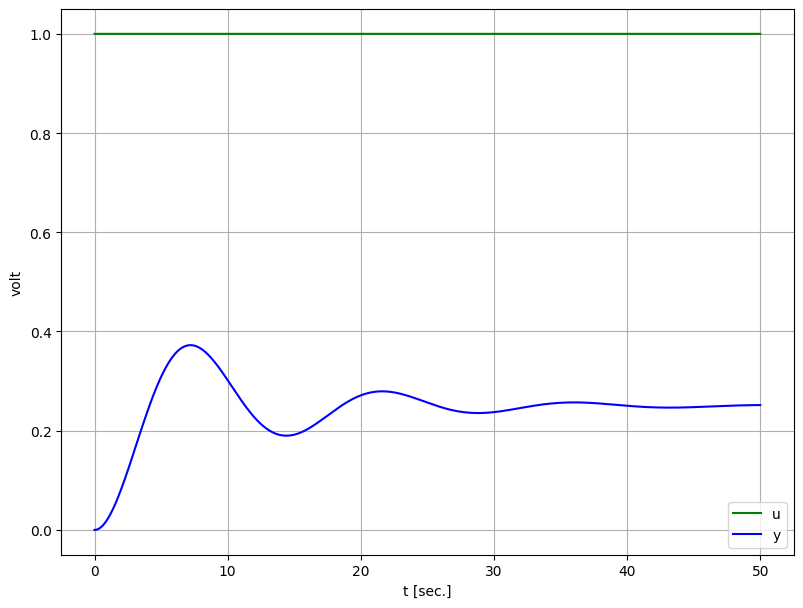

In [19]:
sys = tf2ss(CL)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print(A.shape[0])

# Simulate in a "for" loop
t0 = 0
t1 = 50
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

r = 1 * np.ones(nt)  # Reference input

# controller parameters
kp = 1.0
ki = 0.0
u = 0.0

x = np.zeros([A.shape[0],1])
yplot = np.zeros(nt)
print(yplot.shape)
sum_e = 0

for i in range(nt):
  # state space model
  xdot=np.dot(A, x)+np.dot(B,u)
  x = x + xdot*dt
  y = np.dot(C,x)+np.dot(D,u)

  # controller
  e = r[i] - y
  u = kp * e + ki * sum_e
  sum_e = sum_e + e

  yplot[i] = y

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, yplot, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")